In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# 가상의 데이터 생성
np.random.seed(42)
x_train = np.linspace(0, 10, 20)
y_train = 3 * x_train + np.random.normal(0, 2, size=len(x_train))

In [3]:
x_train

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [4]:
y_train

array([ 0.99342831,  1.30241877,  4.45327181,  7.78290182,  5.84748272,
        7.42646293, 12.63210984, 12.58750104, 11.69263018, 15.2956464 ,
       14.8626383 , 16.43696155, 19.43129296, 16.6997553 , 18.65542749,
       22.55963547, 23.23749565, 27.47059993, 26.60500448, 27.1753926 ])

In [5]:
# 사전 확률 정의: 단순한 정규 분포로 가정
mu_prior = 0
sigma_prior = 10

In [6]:
# 사후 분포 계산 (여기서는 단순히 예시로 평균을 추정)
mu_posterior = (np.mean(y_train) / len(x_train)) + mu_prior
sigma_posterior = sigma_prior / np.sqrt(len(x_train))

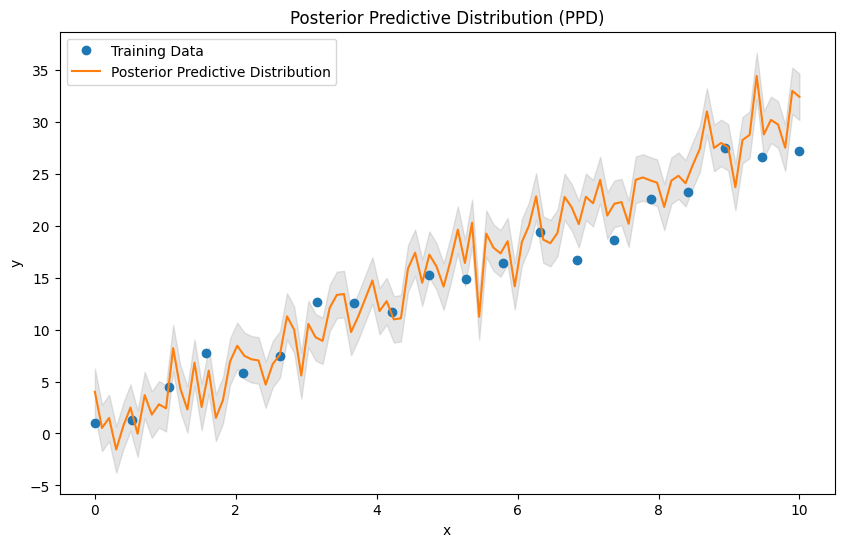

In [7]:
# 새로운 관측치를 위한 사후 예측 분포 (PPD) 계산
x_new = np.linspace(0, 10, 100)
y_new = 3 * x_new + np.random.normal(mu_posterior, sigma_posterior, size=len(x_new))

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot(x_new, y_new, '-', label='Posterior Predictive Distribution')
plt.fill_between(x_new, y_new - sigma_posterior, y_new + sigma_posterior, color='gray', alpha=0.2)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Posterior Predictive Distribution (PPD)')
plt.show()

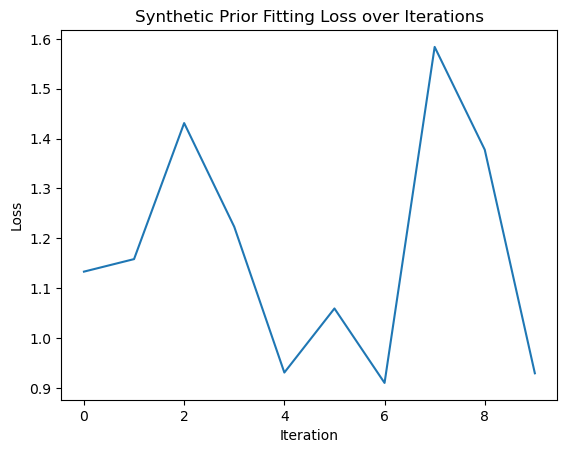

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 사전 확률을 정의 (예: 회귀 계수에 대한 정규 분포)
def sample_prior():
    return np.random.normal(0, 1, size=2)

# 샘플링된 파라미터를 사용해 합성 데이터 생성
def generate_synthetic_data(theta, num_samples=100):
    x = np.linspace(0, 10, num_samples)
    noise = np.random.normal(0, 1, size=num_samples)
    y = theta[0] * x + theta[1] + noise
    return x, y

# 학습 손실 함수 계산 (단순 예제에서는 선형 회귀의 손실로 대체)
def compute_loss(model, x_train, y_train, x_test, y_test):
    model.fit(x_train.reshape(-1, 1), y_train)
    y_pred = model.predict(x_test.reshape(-1, 1))
    loss = np.mean((y_pred - y_test) ** 2)  # MSE를 손실로 사용
    return loss

# 메인 함수: 합성 사전 적합 과정
def synthetic_prior_fitting(num_iterations=10, num_samples=100):
    losses = []
    for _ in range(num_iterations):
        theta = sample_prior()  # 사전에서 파라미터 샘플링
        x, y = generate_synthetic_data(theta, num_samples)  # 합성 데이터 생성
        
        # 데이터를 훈련/테스트로 분할
        split_idx = num_samples // 2
        x_train, y_train = x[:split_idx], y[:split_idx]
        x_test, y_test = x[split_idx:], y[split_idx:]
        
        model = LinearRegression()
        loss = compute_loss(model, x_train, y_train, x_test, y_test)  # 손실 계산
        losses.append(loss)
    
    return losses

# 합성 사전 적합 수행
losses = synthetic_prior_fitting()
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Synthetic Prior Fitting Loss over Iterations')
plt.show()

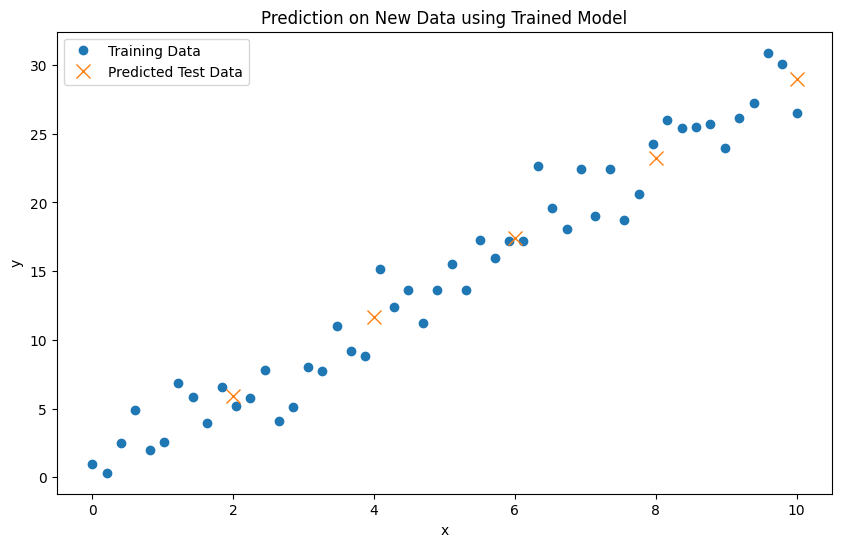

Predictions for new data points: [ 5.89695259 11.66501899 17.43308539 23.20115179 28.96921819]


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 학습된 모델 (간단한 선형 회귀로 가정)
def trained_model(x_train, y_train):
    model = LinearRegression()
    model.fit(x_train.reshape(-1, 1), y_train)
    return model

# 실제 세계의 새로운 데이터에 대한 예측
def predict_new_data(model, x_test):
    y_pred = model.predict(x_test.reshape(-1, 1))
    return y_pred

# 가상의 훈련 데이터 생성
np.random.seed(42)
x_train = np.linspace(0, 10, 50)
y_train = 3 * x_train + np.random.normal(0, 2, size=len(x_train))

# 모델 학습
model = trained_model(x_train, y_train)

# 새로운 데이터 생성 및 예측
x_test = np.array([2, 4, 6, 8, 10])  # 새로운 테스트 데이터
y_pred = predict_new_data(model, x_test)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot(x_test, y_pred, 'x', label='Predicted Test Data', markersize=10)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediction on New Data using Trained Model')
plt.show()

print(f"Predictions for new data points: {y_pred}")

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 간단한 데이터셋 생성 (예: 1000개의 샘플과 10개의 특징)
np.random.seed(42)
X = np.random.rand(1000, 10)  # 1000개의 샘플과 10개의 특징
y = np.random.randint(0, 2, 1000)  # 이진 분류 라벨

# Tensor로 변환
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# 데이터셋 및 데이터로더 생성
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Transformer 모델 정의
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_heads, num_classes):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 128)
        self.transformer_layer = nn.TransformerEncoderLayer(d_model=128, nhead=num_heads)
        self.transformer = nn.TransformerEncoder(self.transformer_layer, num_layers=2)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # x.shape: (batch_size, 10) -> (batch_size, 128)
        x = x.unsqueeze(0)  # Transformer 입력 형태에 맞게 차원을 추가 (1, batch_size, 128)
        x = self.transformer(x)  # (1, batch_size, 128) -> (1, batch_size, 128)
        x = x.mean(dim=0)  # (1, batch_size, 128) -> (batch_size, 128)
        x = self.fc(x)  # (batch_size, 128) -> (batch_size, num_classes)
        return x

# 모델 인스턴스 생성
model = TransformerModel(input_dim=10, num_heads=2, num_classes=2)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습 함수
def train_model(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in dataloader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

# 모델 학습
train_model(model, dataloader, criterion, optimizer)

# 새로운 데이터에 대한 예측
def predict(model, X_new):
    model.eval()
    with torch.no_grad():
        outputs = model(X_new)
        _, predicted = torch.max(outputs, 1)
    return predicted

# 예측 예시
X_new = torch.tensor(np.random.rand(5, 10), dtype=torch.float32)  # 새로운 5개의 샘플
predictions = predict(model, X_new)
print(f'Predictions for new data: {predictions}')

c:\Users\csakg\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10, Loss: 0.7454
Epoch 2/10, Loss: 0.7142
Epoch 3/10, Loss: 0.7858
Epoch 4/10, Loss: 0.7006
Epoch 5/10, Loss: 0.6815
Epoch 6/10, Loss: 0.6202
Epoch 7/10, Loss: 0.6731
Epoch 8/10, Loss: 0.6911
Epoch 9/10, Loss: 0.7933
Epoch 10/10, Loss: 0.7672
Predictions for new data: tensor([0, 0, 0, 0, 0])


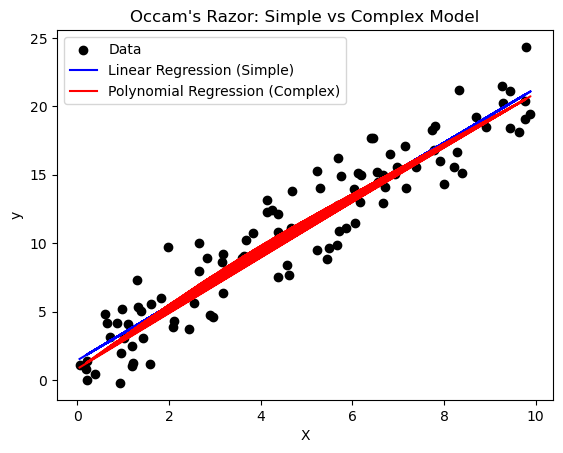

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 데이터 생성 (노이즈가 있는 선형 데이터)
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1) * 2

# 단순한 선형 회귀 모델
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# 복잡한 다항 회귀 모델 (5차 다항식)
polynomial_model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
polynomial_model.fit(X, y)
y_pred_poly = polynomial_model.predict(X)

# 결과 시각화
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression (Simple)')
plt.plot(X, y_pred_poly, color='red', label='Polynomial Regression (Complex)')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Occam\'s Razor: Simple vs Complex Model')
plt.show()

In [2]:
import time

# 빠른 알고리즘: 정렬된 리스트에서 이진 탐색
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# 느린 알고리즘: 선형 탐색
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

# 테스트 데이터 생성
arr = list(range(1000000))  # 0부터 999999까지의 숫자가 있는 리스트
target = 999999

# 이진 탐색 실행 시간 측정
start_time = time.time()
binary_search(arr, target)
binary_time = time.time() - start_time

# 선형 탐색 실행 시간 측정
start_time = time.time()
linear_search(arr, target)
linear_time = time.time() - start_time

print(f"Binary Search Time: {binary_time:.6f} seconds")
print(f"Linear Search Time: {linear_time:.6f} seconds")

Binary Search Time: 0.000000 seconds
Linear Search Time: 0.031380 seconds


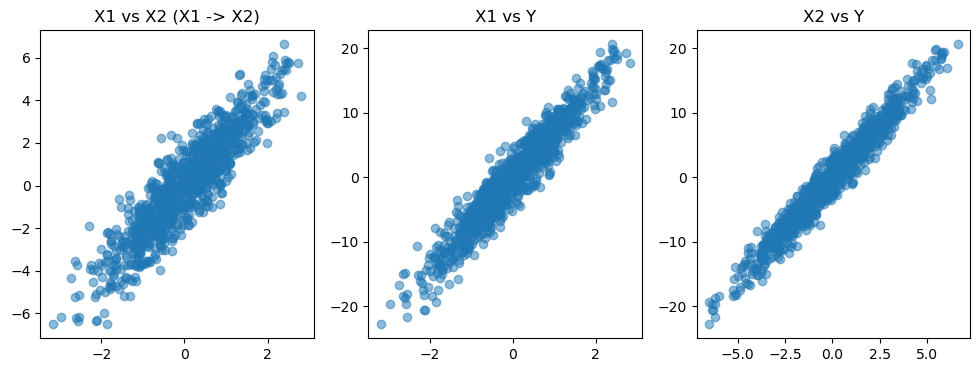

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플 수
n_samples = 1000

# X1을 무작위로 생성
X1 = np.random.normal(size=n_samples)

# X2는 X1에 의해 결정되며, 약간의 노이즈를 가짐
X2 = 2 * X1 + np.random.normal(size=n_samples)

# Y는 X1과 X2에 의해 결정되며, 추가적인 노이즈가 있음
Y = 3 * X1 + 2 * X2 + np.random.normal(size=n_samples)

# 데이터를 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X1, X2, alpha=0.5)
plt.title("X1 vs X2 (X1 -> X2)")

plt.subplot(1, 3, 2)
plt.scatter(X1, Y, alpha=0.5)
plt.title("X1 vs Y")

plt.subplot(1, 3, 3)
plt.scatter(X2, Y, alpha=0.5)
plt.title("X2 vs Y")

plt.show()

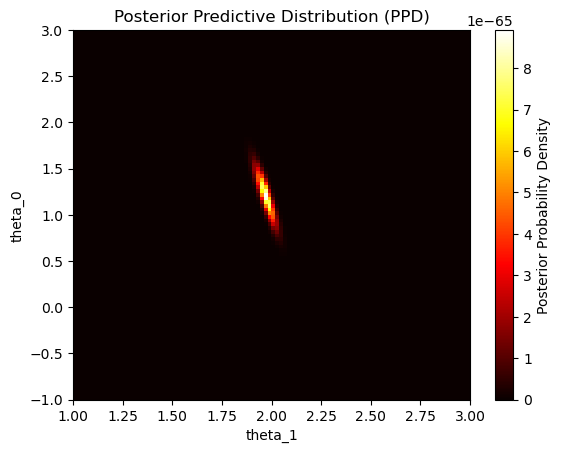

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 데이터 생성
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.normal(0, 1, size=X.shape)

# 사전 설정 (단순한 가우시안 사전)
theta_0_prior_mean = 0
theta_0_prior_std = 5
theta_1_prior_mean = 0
theta_1_prior_std = 5

# 사후 계산
def posterior(theta_0, theta_1, X, y):
    likelihood = np.prod(norm(loc=theta_0 + theta_1 * X, scale=1).pdf(y))
    prior_theta_0 = norm(loc=theta_0_prior_mean, scale=theta_0_prior_std).pdf(theta_0)
    prior_theta_1 = norm(loc=theta_1_prior_mean, scale=theta_1_prior_std).pdf(theta_1)
    return likelihood * prior_theta_0 * prior_theta_1

# PPD 계산
theta_0_samples = np.linspace(-1, 3, 100)
theta_1_samples = np.linspace(1, 3, 100)
ppd = np.zeros((100, 100))

for i, theta_0 in enumerate(theta_0_samples):
    for j, theta_1 in enumerate(theta_1_samples):
        ppd[i, j] = posterior(theta_0, theta_1, X, y)

# 시각화
plt.imshow(ppd, extent=[1, 3, -1, 3], origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='Posterior Probability Density')
plt.xlabel('theta_1')
plt.ylabel('theta_0')
plt.title('Posterior Predictive Distribution (PPD)')
plt.show()

In [2]:
(0.4*(1/21))/((0.4*(1/21)) + (0.1*(20/21)))

0.16666666666666669